<a href="https://colab.research.google.com/github/ahish-mahesh/EchoNews/blob/main/NEWSSEARCHENGINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#News Search Engine



---
#Overview
The aim of this project is to build a search engine that is specially designed for retrieving News Articles.
It will return the most relevant news
articles for a given user query.

The articles are being scraped from a website called politifact which obtains all the tweets done on politics and shows whether they are true or fake by attaching a valid article to them.

For this project, we have taken only the factual articles and have built a search engine with these articles as the dataset.





In [ ]:
!pip install docx2txt
!pip install textract
!apt install antiword
!pip install pdfplumber

  Using cached https://files.pythonhosted.org/packages/8a/fd/6e8746e6965d1a7ea8e97253e3d79e625da5547e8f376f88de5d024bacb9/pdfminer.six-20181108-py2.py3-none-any.whl
ERROR: pdfplumber 0.5.24 has requirement pdfminer.six==20200517, but you'll have pdfminer-six 20181108 which is incompatible.
  Found existing installation: pdfminer.six 20200517
    Uninstalling pdfminer.six-20200517:
      Successfully uninstalled pdfminer.six-20200517
Reading package lists... Done
Building dependency tree       
Reading state information... Done
antiword is already the newest version (0.37-11build1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
  Using cached https://files.pythonhosted.org/packages/b0/c0/ef1c8758bbd86edb10b5443700aac97d0ba27a9ca2e7696db8cd1fdbd5a8/pdfminer.six-20200517-py3-none-any.whl
ERROR: textract 1.6.3 has requirement pdfminer.six==20181108, but you'll have pdfminer-six 20200517 which is incompatible.
  Found existing installation: pdfminer.six 20181108
    Uninst

# Library imports

In [ ]:
from bs4 import BeautifulSoup
import urllib.request,sys,time
import requests
import pandas as pd
import re
import string
import numpy as np
import nltk
from math import log10
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
#url of the page that we want to Scarpe
#+str() is used to convert int datatype of the page no. and concatenate that to a URL for pagination purposes.
page = 1
url = 'https://www.politifact.com/factchecks/list/?page='+str(page)

#Use the browser to get the URL. This is a suspicious command that might blow up.

In [ ]:
try:
     # this might throw an exception if something goes wrong.
        page=requests.get(url)
    # this describes what to do if an exception is thrown
except Exception as e:
    error_type, error_obj, error_info = sys.exc_info()

    #print the link that cause the problem
    print ('ERROR FOR LINK:',url)

    #print error info and line that threw the exception
    print (error_type, 'Line:', error_info.tb_lineno)


In [ ]:
page.status_code

200

In [ ]:
if "Politifact" in page.text:
    print("Yes, Scarpe it")

print (page.headers.get("content-type", "unknown"))

Yes, Scarpe it
text/html; charset=utf-8


# Web scraping

The main logic for web scraping is given in the cell below. It traverses each page containing links for 30 articles from each page. The links in turn are visited and the entire article is being scraped and stored into a dataframe.

In [ ]:
# Main logic

#Total number of pages of the websites to crawl
pagesToGet = 20

frame = []
upperframe = []

for pageNo in range(1,pagesToGet+1):

    url = 'https://www.politifact.com/factchecks/list/?page='+str(pageNo)+'&ruling=true'

    try:
        page=requests.get(url)
    except Exception as e:
        error_type, error_obj, error_info = sys.exc_info()

        print ('ERROR FOR LINK:',url)

        print (error_type, 'Line:', error_info.tb_lineno)
        continue

#     time.sleep(2)

    soup = BeautifulSoup(page.text, "html.parser")
    links=soup.find_all('li',attrs={'class':'o-listicle__item'})

    print("Processing page "+str(pageNo)+"...")

    #Segregating the contents found in the article
    for j in links:
        Link = "https://www.politifact.com"
        Link += j.find("div",attrs={'class':'m-statement__quote'}).find('a')['href'].strip()

        try:
            page=requests.get(Link)
        except Exception as e:
            print(e)

        soup = BeautifulSoup(page.text, "html.parser")
        Title=soup.find('h2',attrs={'class':'c-tilocktle c-title--subline'}).text.strip()
        ArticleTemp=soup.find('article',attrs={'class':'m-textb'})
        Article = soup.find_all('p')
        fullArticle = []
        for i in range(2,len(Article)):
            fullArticle.append(Article[i].text.strip())
        fullArticle = " ".join(fullArticle)

        Date = j.find('div',attrs={'class':'m-statement__body'}).find('footer').text.split("•")[1]
        Date = Date.replace("\n", "")
        Source = j.find('div', attrs={'class':'m-statement__meta'}).find('a').text.strip()
        frame.append([Title, fullArticle, Link,Date,Source])

    print("Done with page "+str(pageNo)+"!")
    upperframe.extend(frame)

Processing page 1...
Done with page 1!
Processing page 2...
Done with page 2!
Processing page 3...
Done with page 3!
Processing page 4...
Done with page 4!
Processing page 5...
Done with page 5!
Processing page 6...
Done with page 6!
Processing page 7...
Done with page 7!
Processing page 8...
Done with page 8!
Processing page 9...
Done with page 9!
Processing page 10...
Done with page 10!
Processing page 11...
Done with page 11!
Processing page 12...
Done with page 12!
Processing page 13...
Done with page 13!
Processing page 14...
Done with page 14!
Processing page 15...
Done with page 15!
Processing page 16...
Done with page 16!
Processing page 17...
Done with page 17!
Processing page 18...
Done with page 18!
Processing page 19...
Done with page 19!
Processing page 20...
Done with page 20!


# Actual Data

The duplicates are removed from the scraped data in this step.

In [ ]:
df=pd.DataFrame(upperframe, columns=['Title', 'Article', 'Link','Date','Source'])
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.drop_duplicates(subset ="Article",keep = 'first', inplace = True)
df=df.reset_index(drop=True)
df.head()

Title  \
0  Yes, Donald Trump claimed fraud after the 2016...   
1  Yes, Department of Homeland Security declared ...   
2  Yes, Joe Biden has released 22 years of tax re...   
3   Fact-check: Farm bankruptcies highest in 8 years   
4  Cooper right about Forest education board atte...   

                                             Article  \
0  President Donald Trump telegraphed that he’d c...   
1  Tammy Baldwin Two cybersecurity committees wit...   
2  Democratic presidential candidate Joe Biden, r...   
3  Theresa Greenfield stepped up to the podium in...   
4  North Carolina Lt. Gov. Dan Forest speaks duri...   

                                                Link                Date  \
0  https://www.politifact.com/factchecks/2020/nov...   November 20, 2020   
1  https://www.politifact.com/factchecks/2020/nov...   November 17, 2020   
2  https://www.politifact.com/factchecks/2020/oct...    October 31, 2020   
3  https://www.politifact.com/factchecks/2020/oct...    October 31, 2020   
4  https://www.politifact.com/factchecks/2020/oct...    October 30, 2020   

               Source  
0              Tweets  
1       Tammy Baldwin  
2           Joe Biden  
3  Theresa Greenfield  
4          Roy Cooper

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import re
nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'[a-z]+')
stop_words = set(stopwords.words('english'))

def remove_tags(text):
  return re.compile(r'<[^>]+>').sub(' ', text)

def remove_escape_sequence(text):
  return re.compile(r'\\[a-z]').sub(' ', text)

def preprocess(document):
  document = document.lower() # Convert to lowercase
  document = remove_tags(remove_escape_sequence(document))
  words = tokenizer.tokenize(document) # Tokenize
  words = [w for w in words if not w in stop_words] # Removing stopwords
  # Lemmatizing
  for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
    words = [wordnet_lemmatizer.lemmatize(x, pos) for x in words]
  return " ".join(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Preprocessed Data
Unwanted html tags, escape sequences, punctutations are removed by using regular expressions. Stop
words which are not so significant are also removed from documents. Lemmatization is also done as a
part of preprocessing to improve performance.

In [ ]:
df['Processed Article'] = df['Article'].apply(preprocess)
df.head()

Title  \
0  Yes, Donald Trump claimed fraud after the 2016...   
1  Yes, Department of Homeland Security declared ...   
2  Yes, Joe Biden has released 22 years of tax re...   
3   Fact-check: Farm bankruptcies highest in 8 years   
4  Cooper right about Forest education board atte...   

                                             Article  \
0  President Donald Trump telegraphed that he’d c...   
1  Tammy Baldwin Two cybersecurity committees wit...   
2  Democratic presidential candidate Joe Biden, r...   
3  Theresa Greenfield stepped up to the podium in...   
4  North Carolina Lt. Gov. Dan Forest speaks duri...   

                                                Link                Date  \
0  https://www.politifact.com/factchecks/2020/nov...   November 20, 2020   
1  https://www.politifact.com/factchecks/2020/nov...   November 17, 2020   
2  https://www.politifact.com/factchecks/2020/oct...    October 31, 2020   
3  https://www.politifact.com/factchecks/2020/oct...    October 31, 2020   
4  https://www.politifact.com/factchecks/2020/oct...    October 30, 2020   

               Source                                  Processed Article  
0              Tweets  president donald trump telegraph claim voter f...  
1       Tammy Baldwin  tammy baldwin two cybersecurity committee with...  
2           Joe Biden  democratic presidential candidate joe biden ri...  
3  Theresa Greenfield  theresa greenfield step podium de moines iowa ...  
4          Roy Cooper  north carolina lt gov dan forest speak debate ...

# Constructing TF x IDF matrix
Term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how
**important a word** is to a document in a collection or corpus. It is often used as a weighting factor in
searches of information retrieval, text mining, and user modeling. The tf–idf value increases
proportionally to the number of times a word appears in the document and is offset by the number of
documents in the corpus that contain the word, which helps to adjust for the fact that some words
appear more frequently in general.


*   TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)
*   tf(t,d) = count of t in d / number of words in d
*   df(t) = occurrence of t in documents
*   idf(t) = N/df (t)




In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(df['Processed Article'].tolist())
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
tf_idf = pd.DataFrame(denselist, columns=feature_names)

In [ ]:
tf_idf.shape

(600, 13762)

In [ ]:
tf_idf.head()

aa  aaa  aab  aacicebmtpkdwsp  aapi  aaron  aarp   ab  ababa  abaebb  \
0  0.0  0.0  0.0              0.0   0.0    0.0   0.0  0.0    0.0     0.0   
1  0.0  0.0  0.0              0.0   0.0    0.0   0.0  0.0    0.0     0.0   
2  0.0  0.0  0.0              0.0   0.0    0.0   0.0  0.0    0.0     0.0   
3  0.0  0.0  0.0              0.0   0.0    0.0   0.0  0.0    0.0     0.0   
4  0.0  0.0  0.0              0.0   0.0    0.0   0.0  0.0    0.0     0.0   

   abandon  abate  abatement  abba  abbas  abbey  abbot  abbott  abbreviate  \
0  0.02535    0.0        0.0   0.0    0.0    0.0    0.0     0.0         0.0   
1  0.00000    0.0        0.0   0.0    0.0    0.0    0.0     0.0         0.0   
2  0.00000    0.0        0.0   0.0    0.0    0.0    0.0     0.0         0.0   
3  0.00000    0.0        0.0   0.0    0.0    0.0    0.0     0.0         0.0   
4  0.00000    0.0        0.0   0.0    0.0    0.0    0.0     0.0         0.0   

   abbreviation  abbvie  abby  abc  abdu  abdul  abdullah  abdur  abe  abel  \
0           0.0     0.0   0.0  0.0   0.0    0.0       0.0    0.0  0.0   0.0   
1           0.0     0.0   0.0  0.0   0.0    0.0       0.0    0.0  0.0   0.0   
2           0.0     0.0   0.0  0.0   0.0    0.0       0.0    0.0  0.0   0.0   
3           0.0     0.0   0.0  0.0   0.0    0.0       0.0    0.0  0.0   0.0   
4           0.0     0.0   0.0  0.0   0.0    0.0       0.0    0.0  0.0   0.0   

   abele  abercrombie  abernathy  abet  abhorrent  abide  abigail  ability  \
0    0.0          0.0        0.0   0.0        0.0    0.0      0.0      0.0   
1    0.0          0.0        0.0   0.0        0.0    0.0      0.0      0.0   
2    0.0          0.0        0.0   0.0        0.0    0.0      0.0      0.0   
3    0.0          0.0        0.0   0.0        0.0    0.0      0.0      0.0   
4    0.0          0.0        0.0   0.0        0.0    0.0      0.0      0.0   

   able  abnormality  abnormally  abolish  abolition  abolitionist  abort  \
0   0.0          0.0         0.0      0.0        0.0           0.0    0.0   
1   0.0          0.0         0.0      0.0        0.0           0.0    0.0   
2   0.0          0.0         0.0      0.0        0.0           0.0    0.0   
3   0.0          0.0         0.0      0.0        0.0           0.0    0.0   
4   0.0          0.0         0.0      0.0        0.0           0.0    0.0   

   abortion  aboutmcdonalds  abraham  abrams  abridge  abroad  abruptly  \
0       0.0             0.0      0.0     0.0      0.0     0.0       0.0   
1       0.0             0.0      0.0     0.0      0.0     0.0       0.0   
2       0.0             0.0      0.0     0.0      0.0     0.0       0.0   
3       0.0             0.0      0.0     0.0      0.0     0.0       0.0   
4       0.0             0.0      0.0     0.0      0.0     0.0       0.0   

   absence  absent  absentee  absenteeism  absolute  absolutely  absolve  \
0      0.0     0.0       0.0          0.0       0.0    0.000000      0.0   
1      0.0     0.0       0.0          0.0       0.0    0.000000      0.0   
2      0.0     0.0       0.0          0.0       0.0    0.014393      0.0   
3      0.0     0.0       0.0          0.0       0.0    0.000000      0.0   
4      0.0     0.0       0.0          0.0       0.0    0.000000      0.0   

   absorb  abstention  abstinence  abstract    absurd  abu  abundance  \
0     0.0         0.0         0.0       0.0  0.027184  0.0        0.0   
1     0.0         0.0         0.0       0.0  0.000000  0.0        0.0   
2     0.0         0.0         0.0       0.0  0.000000  0.0        0.0   
3     0.0         0.0         0.0       0.0  0.000000  0.0        0.0   
4     0.0         0.0         0.0       0.0  0.000000  0.0        0.0   

   abundantly  abuse  abuser  abusively  abysmal  abysmally   ac  aca  \
0         0.0    0.0     0.0        0.0      0.0        0.0  0.0  0.0   
1         0.0    0.0     0.0        0.0      0.0        0.0  0.0  0.0   
2         0.0    0.0     0.0        0.0      0.0        0.0  0.0  0.0   
3         0.0    0.0     0

# Latent Semantic Indexing

* It involves analyzing relationships between a set of documents and the terms they contain by producing a set of concepts related to the documents and terms.
* LSA assumes that words that are close in meaning will occur in similar pieces of text.
* A matrix containing word counts per document (rows represent unique words and columns represent each document) is constructed from a large piece of text.
* A mathematical technique called singular value decomposition (SVD) is used to reduce the number of rows while preserving the similarity structure among columns.
* Documents are then compared by taking the cosine of the angle between the two vectors (or the dot product between the normalizations of the two vectors) formed by any two columns.
* Values close to 1 represent very similar documents while values close to 0 represent very dissimilar documents.


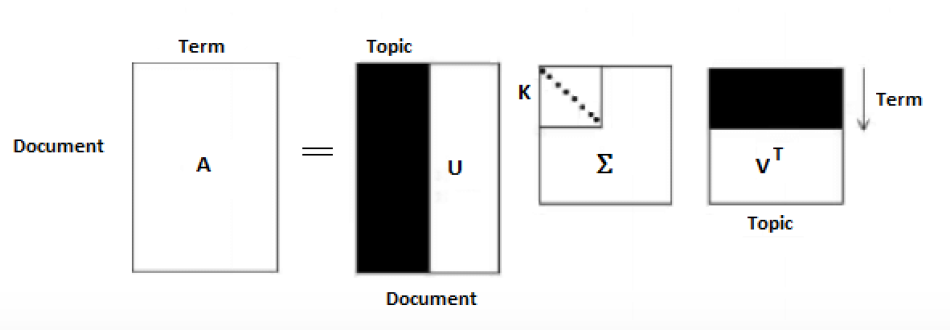



# Applying LSI to Data

In [ ]:
import numpy as np

# Applying SVD
K = 5 # number of concepts

U, s, VT = np.linalg.svd(vectors.T.toarray())
TF_IDF_matrix_reduced = np.dot(U[:,:K], np.dot(np.diag(s[:K]), VT[:K, :]))

# Getting document and term representation
# M X K matrix where M = Vocabulary Size and N = Number of documents
terms_rep = np.dot(U[:,:K], np.diag(s[:K]))
docs_rep = np.dot(np.diag(s[:K]), VT[:K, :]).T # N x K matrix

# Ranking, Querying and Retrieval

## 1. Ranking - Cosine Similarity

Cosine similarity measures the similarity between two vectors of an inner product space. It is measured by the cosine of the angle between two vectors and determines whether two vectors are pointing in roughly the same direction. It is often used to measure document similarity in text analysis.

## 2. Querying and Retrieval

The query is obtained from user and is preprocessed (stop words removal, lemmatization etc,...). The query is then converted to reduced dimension (i.e the concepts dimensions). Then cosine similarity is computed for query and concepts. The most relevant documents to the concepts are retrieved in this process.

In [ ]:
def lsa_query_rep(query):
  query_rep = [vectorizer.vocabulary_[x] for x in preprocess(query).split()]
  query_rep = np.mean(terms_rep[query_rep],axis=0)
  return query_rep

# Query 1

* Here the query term is **"Presidential Elections"**.
* The query is preprocessed.
* The relevant documents for the query are computed and ranked based on cosine similarity score and retrieved.

In [ ]:
from scipy.spatial.distance import cosine

query = 'presidential elections'
query_rep = lsa_query_rep(query)

query_doc_cos_dist = [cosine(query_rep, doc_rep) for doc_rep in docs_rep]
query_doc_sort_index = np.argsort(np.array(query_doc_cos_dist))

print(len(query_doc_sort_index))
print_count = 0
for rank, sort_index in enumerate(query_doc_sort_index):
  print ('Rank : ', rank+1, ' Cosine : ', 1 - query_doc_cos_dist[sort_index],' Document : ',df['Processed Article'][sort_index],  'Index: ', sort_index)
  print()
  if print_count == 4 :
    break
  else:
    print_count += 1

600
Rank :  1  Cosine :  0.9951583244107205  Document :  donald trump campaign eau claire wi nov one week election day mark hoffman milwaukee journal sentinel campaign eau claire wi one week election day republican presidential nominee donald trump message wisconsinite vote early democratic nominee hillary clinton regret wisconsin one several state change early ballot think make mistake trump say nov speech cast ballot early take back cast new one wisconsin act quickly enough whether vote person absentee absentee mail act know spoil something permit wisconsin many year something prior year people do wisconsin election commission spokesman reid magney tell u course unlike election year also apply reverse folk vote early trump could take back ballot spoil work accord wisconsin election commission news release issue day trump speech issue ballot whether poll place clerk office mail ask spoil ballot long ballot cast get new one event make mistake change mind vote mail spoil ballot require 

# Query 2

* Here the query term is **"polls"**.
* The query is preprocessed.
* The relevant documents for the query are computed and ranked based on cosine similarity score and retrieved.

In [ ]:
from scipy.spatial.distance import cosine

query = 'polls'
query_rep = lsa_query_rep(query)

query_doc_cos_dist = [cosine(query_rep, doc_rep) for doc_rep in docs_rep]
query_doc_sort_index = np.argsort(np.array(query_doc_cos_dist))

print_count = 0
for rank, sort_index in enumerate(query_doc_sort_index):
  print ('Rank : ', rank+1, ' Cosine : ', 1 - query_doc_cos_dist[sort_index],' Document : ', df['Processed Article'][sort_index])
  print()
  if print_count == 4 :
    break
  else:
    print_count += 1

Rank :  1  Cosine :  0.9681244117917328  Document :  hillary clinton say president would tackle epidemic gun violence america opponent donald trump would nothing rally cincinnati eight day election day clinton explain trump differ issue gun national rifle association endorse trump return trump adopt various anti gun control position say even say first day office would require every school america let people carry gun classroom clinton say anyone think school would safe gun wonder trump really say put allow gun classroom top priority list throughout election advocate get rid gun free zone school military base argue could prevent mass shoot type location say primary would get rid zone first day office get rid gun free zone school military base say jan rally vermont first day get sign okay first day gun free zone outdoor channel ask trump plan interview two week late go get rid gun free zone military base also go school say add would try work state perhaps override state topic come may tr

# Query 3

* Here the query term is **"Obama and Biden"**.
* The query is preprocessed.
* The relevant documents for the query are computed and ranked based on cosine similarity score and retrieved.

In [ ]:
from scipy.spatial.distance import cosine

query = 'obama and biden'
query_rep = lsa_query_rep(query)

query_doc_cos_dist = [cosine(query_rep, doc_rep) for doc_rep in docs_rep]
query_doc_sort_index = np.argsort(np.array(query_doc_cos_dist))
print(query_doc_sort_index[:5])
print_count = 0
for rank, sort_index in enumerate(query_doc_sort_index):
  print ('Rank : ', rank+1, ' Cosine : ', 1 - query_doc_cos_dist[sort_index],' Document : ', df['Processed Article'][sort_index])
  print()
  if print_count == 4 :
    break
  else:
    print_count += 1

[475 113 423  71 303]
Rank :  1  Cosine :  0.9872511024252374  Document :  president barack obama go philadelphia sept campaign hillary clinton recover pneumonia speech obama hold back critique clinton opponent donald trump one particularly vivid line obama take shoot trump foundation contrast clinton foundation focus improve global health clinton foundation attack critic take money donor might business future president clinton obama none want debate foundation charity obama say one candidate family foundation save countless life around world candidate foundation take money people give charity buy six foot tall paint obama add laughter mean know taste go foot version previously write clinton foundation help million people receive low cost hiv aid medicine well foundation controversy obama statement trump foundation take money people give charity buy six foot tall paint white house confirm statement stem widely read washington post story reporter david fahrenthold write series story tru